# Part II - Ford GoBike System Data Presentation
## by Samuel Shaibu

## Investigation Overview

> In the San Francisco Bay Area of California, there is a regional public bike sharing program called Bay Wheels (formerly Ford GoBike). With approximately 500,000 rides since its debut in 2017, Bay Wheels is the first regional and extensive bicycle sharing system set up in California and along the West Coast of the United States. As of January 2018, it has about 10,000 annual subscribers. The monthly individual trip data for the broader San Francisco Bay area in CSV format from January 2018 to December 2018 comprise the dataset used for this exploratory investigation.




## Dataset Overview

>  This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# To load in the dataset into a pandas dataframe

df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')



In [3]:
# To add a new column - member_age from member birth year

df_ford['member_age'] = 2022 - df_ford['member_birth_year']

In [4]:
# To make some some cleaning and transformation on the data types

df_ford['start_time'] = pd.to_datetime(df_ford['start_time'])
df_ford['end_time'] = pd.to_datetime(df_ford['end_time'])

df_ford['start_station_id'] = df_ford['start_station_id'].astype('str')
df_ford['end_station_id'] = df_ford['end_station_id'].astype('str')
df_ford['bike_id'] = df_ford['bike_id'].astype('str')

df_ford['user_type'] = df_ford['user_type'].astype('category')
df_ford['member_gender'] = df_ford['member_gender'].astype('category')

In [5]:
# To add new columns as duration in minutes and start_time to yyyy-mm-dd format and other transformations

df_ford['duration_minute'] = df_ford['duration_sec']/60
df_ford['start_date'] = df_ford.start_time.dt.strftime('%y-%m-%d')
df_ford['start_date_hour'] = df_ford.start_time.dt.strftime('%H')
df_ford['start_date_day'] = df_ford.start_time.dt.strftime('%A')
df_ford['start_date_month'] = df_ford.start_time.dt.strftime('%B')

In [6]:
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# To make weekday categorical data types

weekday_cate = pd.api.types.CategoricalDtype(ordered = True, categories = weekday)
df_ford['start_date_day'] = df_ford['start_date_day'].astype(weekday_cate)

In [7]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# To make start_month categprical data types

month_cate = pd.api.types.CategoricalDtype(ordered = True, categories = month)
df_ford['start_date_month'] = df_ford['start_date_month'].astype(month_cate)

## Distribution of Trip Duration in minutes

> This histogram visual was built using the `df_ford` dataframe and utilizing the `duration_minute` as the x axis. From the plot, you will observe that the visual is skewed to the right with the trip duration having the highest distribution between 5 to 10 minutes.

Text(0.5, 1.0, 'Distribution of Trip Duration')

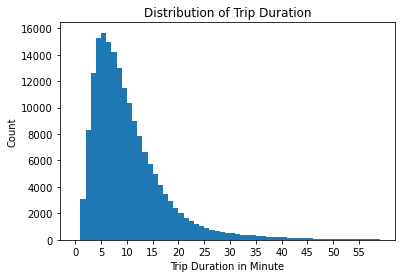

In [8]:
bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data = df_ford, x = 'duration_minute', bins = bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')

## Analysis of Bike Trips by Weekdays Among Genders

> From the multivariate plot below, we can observe that there are lesser bike trips on weekends compared to weekdays. It also shows that the male gender have the highest number of bike trips between monday and friday.

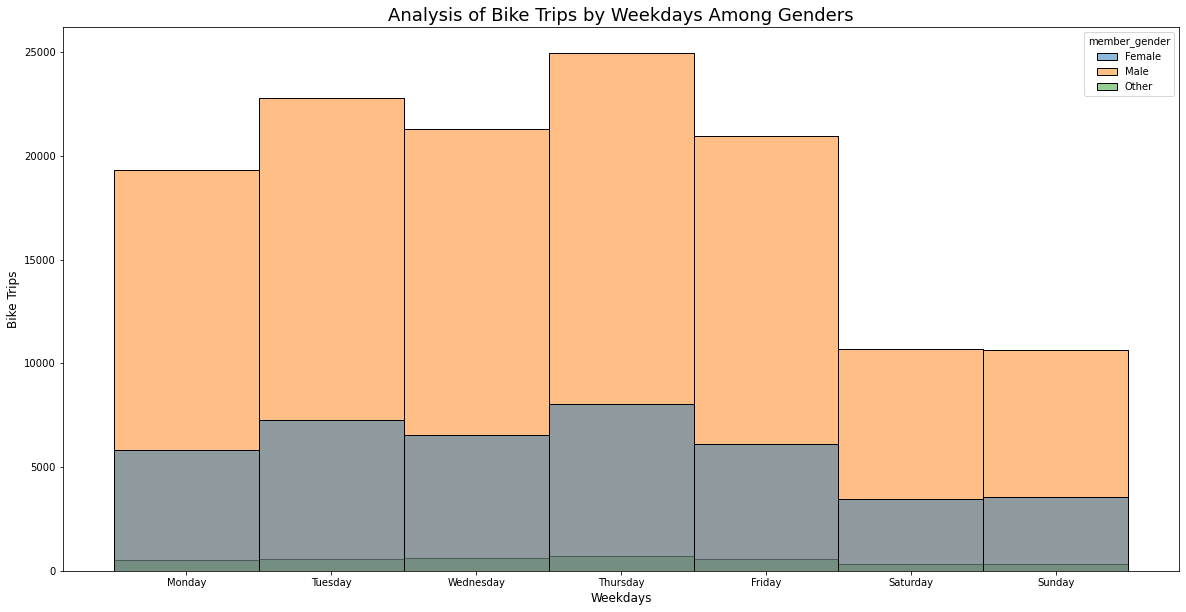

In [9]:
fig, ax = plt.subplots(figsize = (20, 10))
ax = sb.histplot(data = df_ford, x = df_ford['start_date_day'], hue = 'member_gender')
plt.title('Analysis of Bike Trips by Weekdays Among Genders', fontsize = 18)
plt.ylabel('Bike Trips', fontsize = 12)
plt.xlabel('Weekdays', fontsize = 12); 

## Analysis of Bike Trips by Age Among Gender

> From the plot below, we can see the disparity in bike trips between genders of different ages.

* The female gender between the age of 30 and 35 have an average bike trip of 2,500 which is arguably the highest bike trips for the female gender.

* The male gender between the age of 27 to 37 records the highest number of bike trips. More than 7,000 bike trips. 



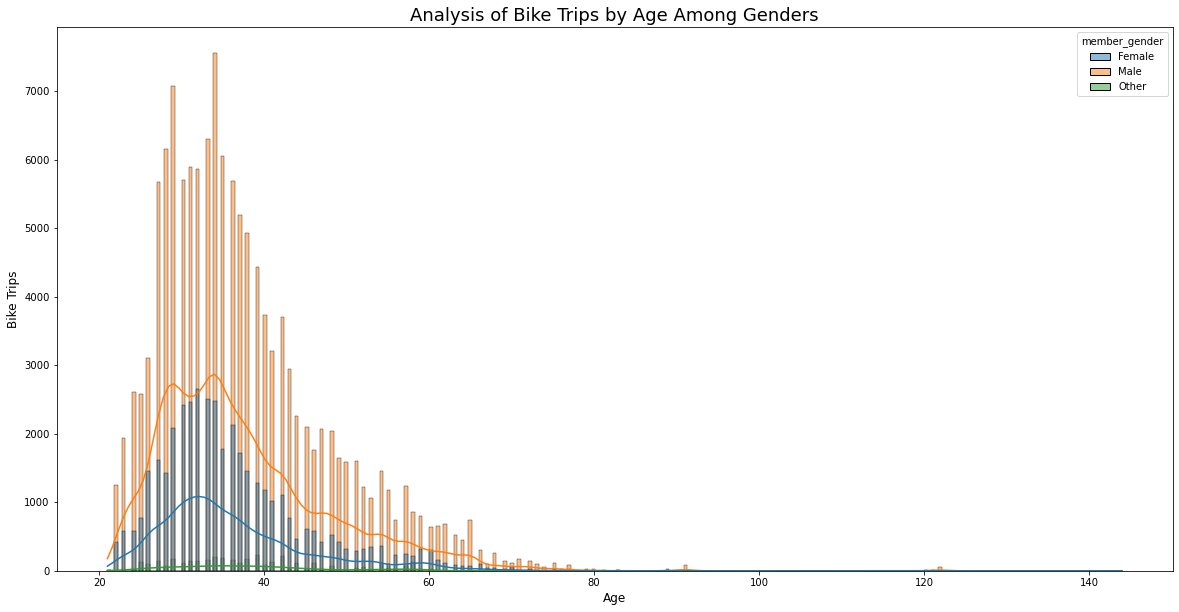

In [10]:
fig, ax = plt.subplots(figsize = (20, 10))
ax = sb.histplot(data = df_ford, x = df_ford['member_age'], hue = 'member_gender', kde = True)
plt.title('Analysis of Bike Trips by Age Among Genders', fontsize = 18)
plt.ylabel('Bike Trips', fontsize = 12)
plt.xlabel('Age', fontsize = 12); 

In [ ]:
!jupyter nbconvert Part_II_slide_deck_ford.ipynb --to slides --post serve --no-input --no-prompt